In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: load the validated datasets
print("Loading the validated datasets...")
train_final = pd.read_csv('engineered_data/fraudTrain_engineered.csv')
test_final = pd.read_csv('engineered_data/fraudTest_engineered.csv')

Loading the validated datasets...


In [ ]:
# Step 2: prepare features and target
# encode gender using one-hot encoding
train_final = pd.get_dummies(train_final, columns=['gender'], drop_first=True)
test_final = pd.get_dummies(test_final, columns=['gender'], drop_first=True)

In [ ]:
# define features 
features = [col for col in train_final.columns if col not in ['is_fraud']]
X_train = train_final[features]
y_train = train_final['is_fraud']
X_test = test_final[features]
y_test = test_final['is_fraud']

In [ ]:
# Step 3: apply SMOTE to balance the training data
print("Applying SMOTE to balance the training data...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Applying SMOTE to balance the training data...


In [ ]:
# Step 4: train the random forest model
print("Training a Random Forest model with SMOTE...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

Training a Random Forest model with SMOTE...


RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: get predicted probabilities
print("Generating predicted probabilities...")
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

Generating predicted probabilities...


In [ ]:
# Step 6: test different thresholds
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
for thresh in thresholds:
    y_pred_custom = (y_pred_prob > thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, y_pred_custom))


Threshold: 0.2
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.38      0.88      0.53      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.94      0.76    555719
weighted avg       1.00      0.99      1.00    555719


Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.85      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.92      0.82    555719
weighted avg       1.00      1.00      1.00    555719


Threshold: 0.4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.81      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.83      0.91      0.86    555719
weighted avg       1.00   

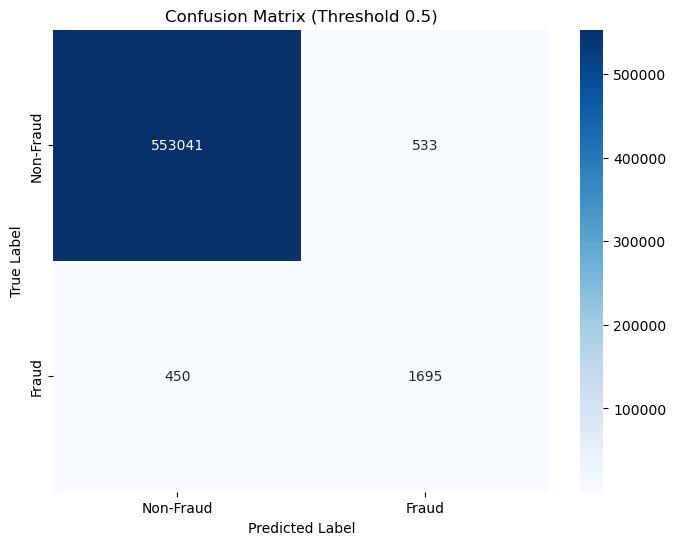

In [ ]:
# Step 7: visualize Confusion Matrix for the default threshold (0.5)
cm = confusion_matrix(y_test, (y_pred_prob > 0.5).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (Threshold 0.5)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()